In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df=pd.read_csv('clean.csv')

In [3]:
df.head()


,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,boat,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1499.0,3999.0,4.0,32704.0,8.0,1.7,42.5,-2500.000000,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
x=df.drop('Discount Price',axis=1)
y=df['Discount Price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model=LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred=lr_model.predict(X_test)

In [18]:
res = r2_score(y_test, y_pred)
print(res)

1.0


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

res = r2_score(y_test, y_pred)
print(res)

1.0


**Decision Tree**

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.7367444223165782


**Random Forest**

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.5925850700104429


In [26]:
import xgboost as xgb

In [27]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.6958960389142593


In [28]:
from sklearn.model_selection import cross_val_score

In [30]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(dt_model, x, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.8507845554232061
cross_val_score:  [ 0.27350238  0.38900814  0.01591844 -0.30871026 -0.06247748] 0.061448243321299924 0.24767329700909954


In [32]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(rf_model, x, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.5515044158787374
cross_val_score:  [0.4541577  0.7335231  0.44023995 0.6242537  0.79894766] 0.6102244212862533 0.14440733058905847


In [34]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(model, x, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.6958960389142593
cross_val_score:  [0.71687457 0.85160856 0.65360352 0.52677189 0.59881393] 0.6695344907745987 0.11047932405115406


In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_gird = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_gird, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBRegressor(**best_params)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7460260949741992


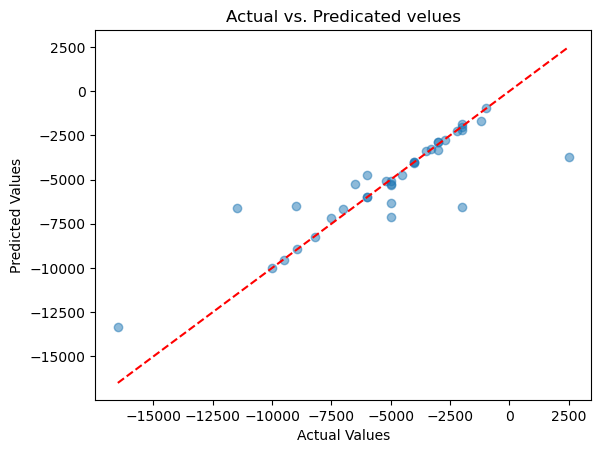

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred, alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated velues')
plt.show()

In [38]:
import pickle 

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [39]:
with open('model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

In [40]:
y_pred = xgb_model.predict(X_test)

print(r2_score(y_test, y_pred))

0.7460260949741992
